In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
print (pd.__name__, pd.__version__)

pandas 0.20.1


In [2]:
cid = '4909' # BTC/USDT #4327 # ZEC/BTC 1261 # PAC/DTC 5662 # ETH/BTC 5760 # ETH/USDT
dri = '3' # hours is
dgi = '240'
path = 'https://www.cryptopia.co.nz/Exchange/GetTradePairChart?tradePairId=' +cid+ '&dataRange='+dri+'&dataGroup=' +dgi
r = requests.get(path); r # .text

<Response [200]>

In [3]:
# df = json_normalize(json.loads(r.text))
# df = pd.DataFrame.from_records(json.loads(r.text)['Candle'])
df = pd.DataFrame.from_records(json.loads(r.text)['Candle'],  columns=['Timestamp', 'Close', 'Max', 'Min', 'Ave'])

In [4]:
df.head()

,Timestamp,Close,Max,Min,Ave
0,1513324609086,16449.000000,17599.0,16352.0,17180.200287
1,1513339009086,17180.200287,17600.0,17010.0,17120.000000
2,1513353409086,17200.000000,18000.0,17016.0,17945.900000
3,1513367809086,17992.000000,17992.0,17550.0,17750.000000
4,1513382209086,17750.000000,17800.0,17505.0,17700.000000


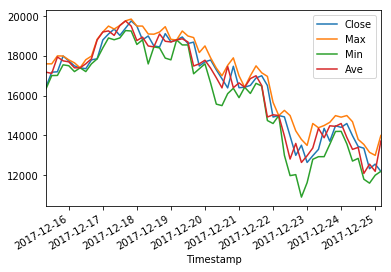

In [5]:
newdf = df
#newdf['Timestamp'] = df['Timestamp']
# newdf['Timestamp'] = pd.to_datetime(df['Timestamp'])#, unit='s') # перевод даты
newdf['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
newindex = newdf.set_index(newdf['Timestamp'])
newdf.head(60).plot.line(x='Timestamp')
# datetime.fromtimestamp(int("1513638876").strftime('%Y-%m-%d %H:%M:%S')

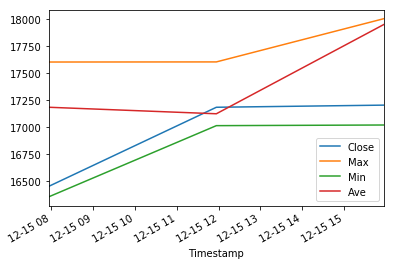

In [12]:
newnewdf = newdf.set_index(keys='Timestamp')
newdf.head(3).plot.line(x='Timestamp')

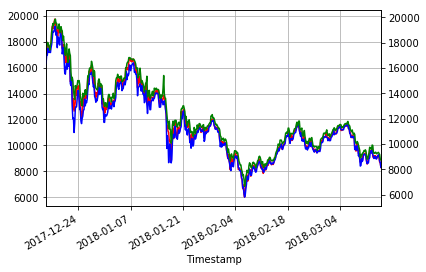

In [7]:
newnewdf['Min'].plot(color='blue', grid=True, secondary_y=True)
newnewdf['Max'].plot(color='green',grid=True, secondary_y=True)
newnewdf['Ave'].plot(color='red',grid=True)
.strftime('%Y-%m-%d %H:%M:%S')
plt.show()